# Model Card Toolkit - COVID-19

Instalar librerias

In [ ]:
!pip install --upgrade pip==21.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:
!pip install -q model-card-toolkit

     |████████████████████████████████| 79 kB 3.6 MB/s             
     |████████████████████████████████| 133 kB 9.6 MB/s            
     |████████████████████████████████| 6.6 MB 53.6 MB/s            
     |████████████████████████████████| 48 kB 4.7 MB/s             
     |████████████████████████████████| 56 kB 3.8 MB/s             
     |████████████████████████████████| 1.8 MB 46.5 MB/s            
     |████████████████████████████████| 2.4 MB 49.6 MB/s            
     |████████████████████████████████| 49 kB 5.1 MB/s             
     |████████████████████████████████| 129 kB 74.4 MB/s            
     |████████████████████████████████| 793 kB 35.7 MB/s            
     |████████████████████████████████| 19.1 MB 318 kB/s             
     |████████████████████████████████| 23.6 MB 1.0 MB/s             
     |████████████████████████████████| 14.8 MB 44.5 MB/s            
     |████████████████████████████████| 10.3 MB 21.9 MB/s            
     |█████████████████████████████

**Reiniciar el entorno de ejecución para que la libreria funcione correctamente.**

(Posicionese en Entorno de Ejecución y reinicie manualmente)

In [ ]:
import model_card_toolkit as mctlib
mctlib.__version__

'1.3.2'

In [ ]:
from datetime import date
from io import BytesIO
from IPython import display
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, plot_confusion_matrix, confusion_matrix, classification_report
from sklearn.metrics import precision_score, accuracy_score, auc
from model_card_toolkit.utils.graphics import figure_to_base64str

import base64
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import uuid
import os
import tensorflow as tf
import numpy as np
import tempfile
import requests
import zipfile

pd.set_option('display.max_columns', None)

Archivo CSV con las metricas e imagenes

In [ ]:
!gdown --id 1V3CWkfHZIUj6wE9IyBewbb48SGFhmI9j

!gdown --id 1xpSyoS56ywGVdOdRE2gvn7ZDfIs6KfdN
!gdown --id 1bzrFyC3AJBTJ6FCbVd_-ILDALm2aUnTg
!gdown --id 1j6CnvKhBpKH6-KOw2XiLI1MCK6V_3f3Q

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1V3CWkfHZIUj6wE9IyBewbb48SGFhmI9j
To: /content/metrics.csv
100% 1.13k/1.13k [00:00<00:00, 1.84MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1xpSyoS56ywGVdOdRE2gvn7ZDfIs6KfdN
To: /content/figure14.jpg
100% 135k/135k [00:00<00:00, 73.3MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: http

Creación de directorio para almacenar archivos de Model Cards

In [ ]:
!mkdir /content/model_card_files
model_card_dir = os.path.join('/content/model_card_files')

## Metricas del modelo entrenado (VGG-19)

In [ ]:
df = pd.read_csv('/content/metrics.csv')
df.head(10)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,age,0.0 - 25.0,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.03,0.59,0.59
1,age,25.0 - 50.0,0.95,0.96,0.06,0.03,0.04,0.05,0.94,0.97,0.33,0.53,0.54
2,age,50.0 - 75.0,0.96,0.98,0.02,0.05,0.02,0.04,0.98,0.95,0.30,0.33,0.33
3,age,75.0 - 100.0,0.75,0.96,0.11,0.10,0.04,0.25,0.89,0.90,0.06,0.26,0.32
4,age,Not found,0.96,0.98,0.03,0.02,0.02,0.04,0.97,0.98,0.28,0.44,0.45
5,sex,F,0.92,0.96,0.06,0.05,0.04,0.08,0.94,0.95,0.36,0.45,0.47
6,sex,I,0.82,1.00,0.06,0.00,0.00,0.18,0.94,1.00,0.04,0.22,0.27
7,sex,M,0.97,0.98,0.02,0.03,0.02,0.03,0.98,0.97,0.60,0.41,0.41
8,went_icu,N,1.00,0.95,0.00,0.11,0.05,0.00,1.00,0.89,0.11,0.34,0.31
9,went_icu,NR,0.92,0.97,0.07,0.03,0.03,0.08,0.93,0.97,0.60,0.44,0.47


In [ ]:
df.attribute_name.values

array(['age', 'age', 'age', 'age', 'age', 'sex', 'sex', 'sex', 'went_icu',
       'went_icu', 'went_icu', 'location', 'location', 'location',
       'location', 'location'], dtype=object)

In [ ]:
df.replace(to_replace=0.00, value=0.0002, inplace=True)
df.head(17)

,attribute_name,attribute_value,tpr,tnr,for,fdr,fpr,fnr,npv,precision,ppr,pprev,prev
0,age,0.0 - 25.0,1.00,1.00,0.0002,0.0002,0.0002,0.0002,1.00,1.00,0.03,0.59,0.59
1,age,25.0 - 50.0,0.95,0.96,0.0600,0.0300,0.0400,0.0500,0.94,0.97,0.33,0.53,0.54
2,age,50.0 - 75.0,0.96,0.98,0.0200,0.0500,0.0200,0.0400,0.98,0.95,0.30,0.33,0.33
3,age,75.0 - 100.0,0.75,0.96,0.1100,0.1000,0.0400,0.2500,0.89,0.90,0.06,0.26,0.32
4,age,Not found,0.96,0.98,0.0300,0.0200,0.0200,0.0400,0.97,0.98,0.28,0.44,0.45
5,sex,F,0.92,0.96,0.0600,0.0500,0.0400,0.0800,0.94,0.95,0.36,0.45,0.47
6,sex,I,0.82,1.00,0.0600,0.0002,0.0002,0.1800,0.94,1.00,0.04,0.22,0.27
7,sex,M,0.97,0.98,0.0200,0.0300,0.0200,0.0300,0.98,0.97,0.60,0.41,0.41
8,went_icu,N,1.00,0.95,0.0002,0.1100,0.0500,0.0002,1.00,0.89,0.11,0.34,0.31
9,went_icu,NR,0.92,0.97,0.0700,0.0300,0.0300,0.0800,0.93,0.97,0.60,0.44,0.47


## Graficas: Analisis Cuantitativo y Dataset

In [ ]:
etiquetas = ['Age (0-25)', 'Age (25-50)', 'Age (50-75)', 'Age (75-100)', 'Age (Not Found)',
             'Sex (Female)', 'Sex (Not Found)', 'Sex (Male)',
             'UCI (Not)', 'UCI (Not Found)', 'UCI (Yes)',
             'Location (America)', 'Location (Asia)', 'Location (Europe)', 'Location (Not Found)', 'Location (Oceania)']

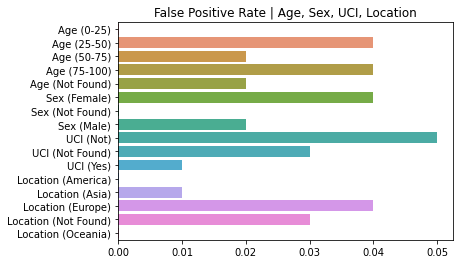

In [ ]:
all_fpr = [df.loc[i, 'fpr'] for i in range(df.shape[0])]

fig, ax = plt.subplots()
sns.barplot(x=all_fpr[:], y=etiquetas)
plt.title('False Positive Rate | Age, Sex, UCI, Location')

fpr_image = figure_to_base64str(fig)

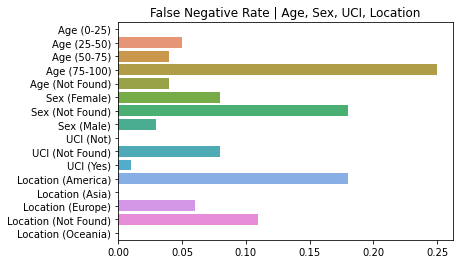

In [ ]:
all_fnr = [df.loc[i, 'fnr'] for i in range(df.shape[0])]

fig, ax = plt.subplots()
sns.barplot(x=all_fnr, y=etiquetas)
plt.title('False Negative Rate | Age, Sex, UCI, Location')

fnr_image = figure_to_base64str(fig)

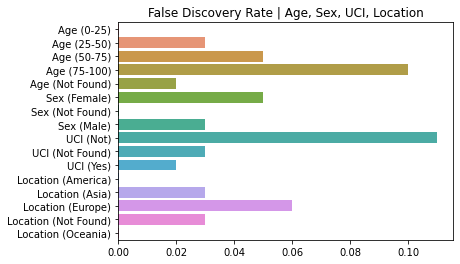

In [ ]:
all_fdr = [df.loc[i, 'fdr'] for i in range(df.shape[0])]

fig, ax = plt.subplots()
sns.barplot(x=all_fdr, y=etiquetas)
plt.title('False Discovery Rate | Age, Sex, UCI, Location')

fdr_image = figure_to_base64str(fig)

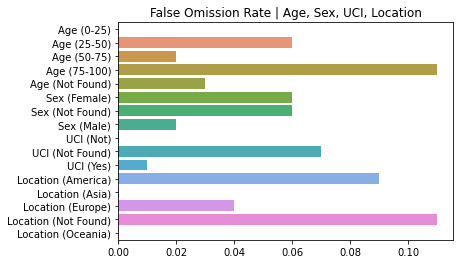

In [ ]:
all_for = [df.loc[i, 'for'] for i in range(df.shape[0])]

fig, ax = plt.subplots()
sns.barplot(x=all_for, y=etiquetas)
plt.title('False Omission Rate | Age, Sex, UCI, Location')

for_image = figure_to_base64str(fig)

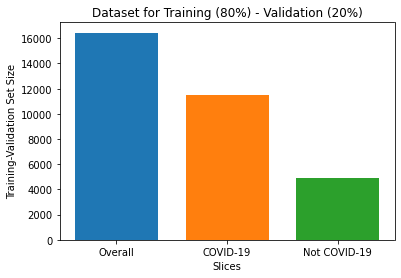

In [ ]:
fig, ax = plt.subplots()
width = 0.75
rects0 = ax.bar(0, 16444, width, label='Overall', )
rects1 = ax.bar(1, 11522, width, label='COVID-19')
rects2 = ax.bar(2, 4922, width, label='Not COVID-19')
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['Overall', 'COVID-19', 'Not COVID-19'])
ax.set_ylabel('Training-Validation Set Size')
ax.set_xlabel('Slices')
ax.set_title('Dataset for Training (80%) - Validation (20%)')

Dataset_for_Training_Validation = figure_to_base64str(fig)

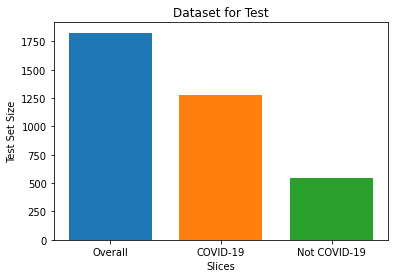

In [ ]:
fig, ax = plt.subplots()
width = 0.75
rects0 = ax.bar(0, 1827, width, label='Overall', )
rects1 = ax.bar(1, 1280, width, label='COVID-19')
rects2 = ax.bar(2, 547, width, label='Not COVID-19')
ax.set_xticks(np.arange(3))
ax.set_xticklabels(['Overall', 'COVID-19', 'Not COVID-19'])
ax.set_ylabel('Test Set Size')
ax.set_xlabel('Slices')
ax.set_title('Dataset for Test')

Dataset_for_Test = figure_to_base64str(fig)

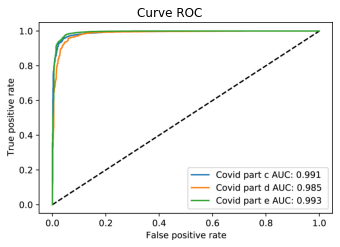

In [ ]:
figura = plt.imread('/content/figure14.jpg')
fig, ax = plt.subplots()
plt.imshow(figura[:,:,:3])
plt.title('Curve ROC')
ax.axis('off')

roc_curve = figure_to_base64str(fig)

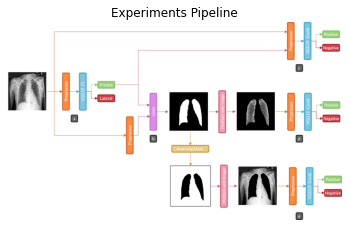

In [ ]:
figura = plt.imread('/content/figure1.jpg')
fig, ax = plt.subplots()
plt.imshow(figura[:,:,:3])
plt.title('Experiments Pipeline')
ax.axis('off')

experiments = figure_to_base64str(fig)

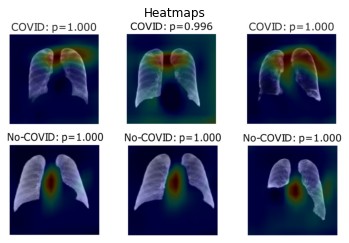

In [ ]:
figura = plt.imread('/content/figure17.jpg')
fig, ax = plt.subplots()
plt.imshow(figura[:,:,:3])
plt.title('Heatmaps')
ax.axis('off')

heatmaps = figure_to_base64str(fig)

## Creación de Model Card

In [ ]:
#model_card_dir = tempfile.mkdtemp()

mct = mctlib.ModelCardToolkit(model_card_dir)

model_card = mct.scaffold_assets()

Model Details

In [ ]:
model_card.model_details.name = 'Classification of COVID-19 in Chest X-rays with CNN'
model_card.model_details.overview = (
    'Deep learning computational model for image processing using convolutional neural \
    networks to detect COVID-19 from chest X-ray images as a fast, cheap and accurate way \
    of diagnosis.\nThe model was trained and validated with 18271 X-ray images. The BIMCV (Spain) provided \
    all the images with the respective annotations.'
)
                                     
model_card.model_details.owners = [
  mctlib.Owner(name='UAM + SES + BIMCV', contact='rtabares@autonoma.edu.co')
]
model_card.model_details.version = mctlib.Version(name='v1.0', date='15/12/2021')
model_card.model_details.references = [
    mctlib.Reference(reference='https://cxr.autonoma.edu.co/#/pages/resources'),
    mctlib.Reference(reference='https://www.sciencedirect.com/science/article/pii/S2666827021000694'),
    mctlib.Reference(reference='https://github.com/BioAITeam?tab=repositories'),
    mctlib.Reference(reference='https://www.igi-global.com/chapter/deep-learning-applied-to-covid-19-detection-in-x-ray-images/305024')
]
model_card.model_details.citations = [mctlib.Citation(citation='https://github.com/BioAITeam/COVID19-Detection')]

Model Parameters

In [ ]:
model_card.model_parameters.model_architecture = 'VGG-19 (CNN)'
model_card.model_parameters.input_format = 'Images 224×224×1'
model_card.model_parameters.output_format = '0: Not COVID-19 - 1: COVID-19'

Performance Metrics (Table)

In [ ]:
model_card.quantitative_analysis.performance_metrics = [
  mctlib.PerformanceMetric(type='Accuracy', value=('96.2 | 97.3 | 96.9'), slice='[c, d, e]'),
  mctlib.PerformanceMetric(type='Sensitivity', value=('97.3 | 92.8 | 98.1'), slice='[c, d, e]'),
  mctlib.PerformanceMetric(type='Specificity', value=('93.5 | 95.6 | 94.6'), slice='[c, d, e]'),
  mctlib.PerformanceMetric(type='F1 Score', value=('97.3 | 95.4 | 97.9'), slice='[c, d, e]')
]

Considerations

In [ ]:
model_card.considerations.users = [
    mctlib.User(description='Hospitals or Clinics: Radiologists.')
]
model_card.considerations.use_cases = [
    mctlib.UseCase(description='This model classifies x-ray images of people who do and do not have covid-19.')
]
model_card.considerations.limitations = [
    mctlib.Limitation(description='This model is not able to classify images of other classes. '),
    mctlib.Limitation(description='This model only correctly classifies frontal view x-ray images. '),
    mctlib.Limitation(description='Data from BIMCV (Spain) and SES (Colombia). Diversity in "Groups" such as age, gender, partition and demographic characteristics.. '),
    mctlib.Limitation(description='"Instruments": X-rays were taken with portable (severe cases) and local equipment. The labeling of the radiographs was performed by different radiologists.'),
    mctlib.Limitation(description='"Environment": Front lung. It is suggested to use the same equipment and eliminate cables or any other instrument that can generate noise.')
]

model_card.considerations.ethical_considerations = [mctlib.Risk(name= 'If an x-ray image with pneumonia is entered, the model \
                                                                      may classify it as a patient with covid-19.',
                                                                mitigation_strategy='Verify that the input image does not present pneumonia.'),
                                                    mctlib.Risk(name= 'The model serves only as a support system for radiologists \
                                                                      or professionals in medical image analysis.',
                                                                mitigation_strategy='A qualified person must make the final decision.')]

Images

In [ ]:
model_card.model_parameters.data.append(mctlib.Dataset())
model_card.model_parameters.data[0].graphics.description = ('Images for Training and Validation')
model_card.model_parameters.data[0].graphics.collection = [mctlib.Graphic(name='Dataset Training-Validation',
                                                                          image=Dataset_for_Training_Validation)]

model_card.model_parameters.data.append(mctlib.Dataset())
model_card.model_parameters.data[1].graphics.description = ('Images for Test/Evaluation')
model_card.model_parameters.data[1].graphics.collection = [mctlib.Graphic(name='Dataset Test',
                                                                          image=Dataset_for_Test)]

model_card.model_parameters.data.append(mctlib.Dataset())
model_card.model_parameters.data[2].graphics.description = ('Experiments')
model_card.model_parameters.data[2].graphics.collection = [mctlib.Graphic(name='Experiments',
                                                                          image=experiments)]

model_card.model_parameters.data.append(mctlib.Dataset())
model_card.model_parameters.data[3].graphics.description = ('Heatmaps')
model_card.model_parameters.data[3].graphics.collection = [mctlib.Graphic(name='Heatmaps',
                                                                          image=heatmaps)]

# Descripción e ingreso de graficas (Analisis Cuantitativo)
model_card.quantitative_analysis.graphics.description = ('The metrics used were ROC Curve, False Positive Rate, False Negative Rate, False Discovery Rate, False Omssion Rate. \nCross validation was also performed with STD 0.01 and 5 models were trained.')
model_card.quantitative_analysis.graphics.collection = [mctlib.Graphic(name='ROC Curve', image=roc_curve),
                                                        mctlib.Graphic(name='False Positive Rate', image=fpr_image),
                                                        mctlib.Graphic(name='False Negative Rate', image=fnr_image),
                                                        mctlib.Graphic(name='False Discovery Rate', image=fdr_image),
                                                        mctlib.Graphic(name='False Omission Rate',image=for_image)
                                                        ]

In [ ]:
# Update model_card
mct.update_model_card(model_card)

Name,Value
"Accuracy, [c, d, e]","96.2 | 97.3 | 96.9 (None, None)"
"Sensitivity, [c, d, e]","97.3 | 92.8 | 98.1 (None, None)"
"Specificity, [c, d, e]","93.5 | 95.6 | 94.6 (None, None)"
"F1 Score, [c, d, e]","97.3 | 95.4 | 97.9 (None, None)"

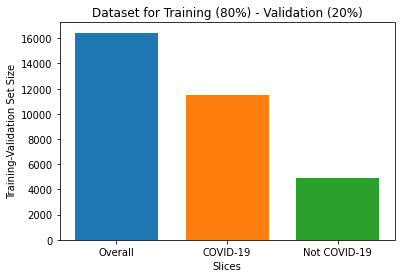
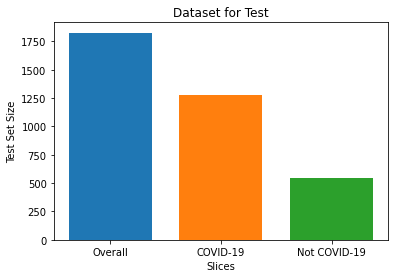
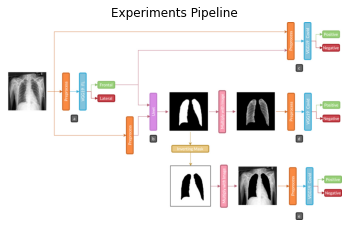
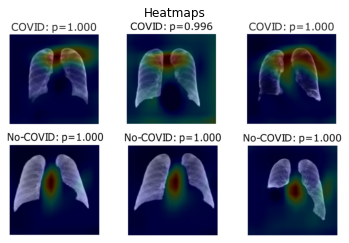
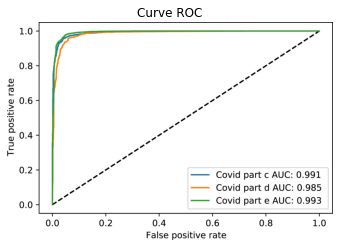
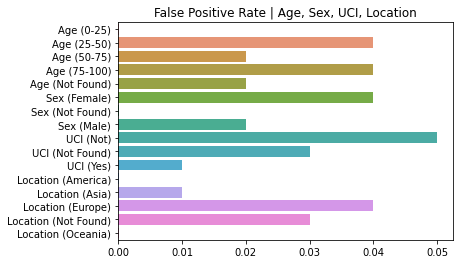
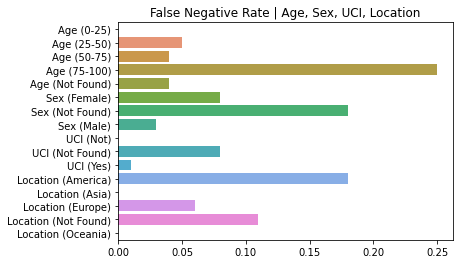
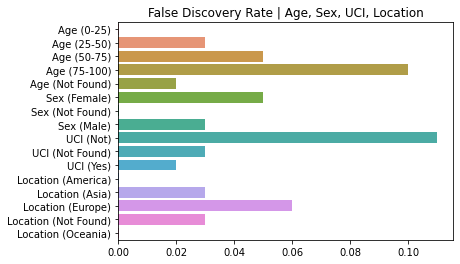
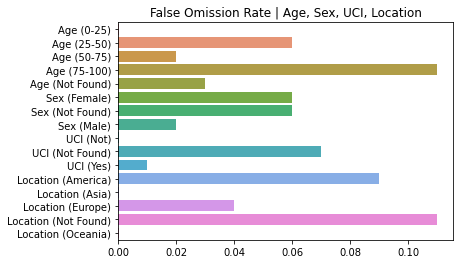

In [ ]:
# Generate a model card document in HTML (default)
html_doc = mct.export_format()

# Display the model card document in HTML
display.display(display.HTML(html_doc))







# Model Card for Classification of COVID-19 in Chest X-rays with CNN

## Model Details

### Overview
Deep learning computational model for image processing using convolutional neural     networks to detect COVID-19 from chest X-ray images as a fast, cheap and accurate way     of diagnosis.
The model was trained and validated with 18271 X-ray images. The BIMCV (Spain) provided     all the images with the respective annotations. 

### Version

name: v1.0  

date: 15/12/2021  

### Owners

* UAM + SES + BIMCV, rtabares@autonoma.edu.co


### References

* [https://cxr.autonoma.edu.co/#/pages/resources](https://cxr.autonoma.edu.co/#/pages/resources)
* [https://www.sciencedirect.com/science/article/pii/S2666827021000694](https://www.sciencedirect.com/science/article/pii/S2666827021000694)
* [https://github.com/BioAITeam?tab=repositories](https://github.com/BioAITeam?tab=repositories)
* [https://www.igi-global.com/chapter/deep-learning-applied-to-covid-19-detection-in-x-ray-images/305024](https://www.igi-global.com/chapter/deep-learning-applied-to-covid-19-detection-in-x-ray-images/305024)


### Citations

* https://github.com/BioAITeam/COVID19-Detection


## Model Parameters

### Model Architecture

VGG-19 (CNN)

### Input Format

Images 224×224×1


### Output Format

0: Not COVID-19 - 1: COVID-19



## Considerations

### Users

* Hospitals or Clinics: Radiologists.


### Use Cases

* This model classifies x-ray images of people who do and do not have covid-19.


### Limitations

* This model is not able to classify images of other classes. 

* This model only correctly classifies frontal view x-ray images. 

* Data from BIMCV (Spain) and SES (Colombia). Diversity in &#34;Groups&#34; such as age, gender, partition and demographic characteristics.. 

* &#34;Instruments&#34;: X-rays were taken with portable (severe cases) and local equipment. The labeling of the radiographs was performed by different radiologists.

* &#34;Environment&#34;: Front lung. It is suggested to use the same equipment and eliminate cables or any other instrument that can generate noise.


### Ethical Considerations

* Risk: If an x-ray image with pneumonia is entered, the model                                                                       may classify it as a patient with covid-19.
  * Mitigation Strategy: Verify that the input image does not present pneumonia.

* Risk: The model serves only as a support system for radiologists                                                                       or professionals in medical image analysis.
  * Mitigation Strategy: A qualified person must make the final decision.

## Graphics
  
### Dataset Training-Validation
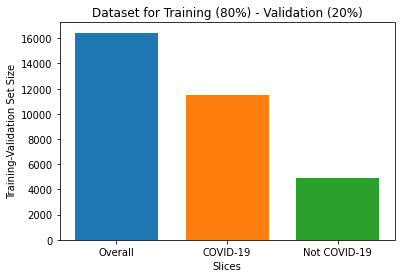
  
### Dataset Test
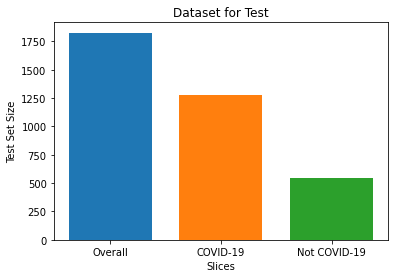
  
### Experiments
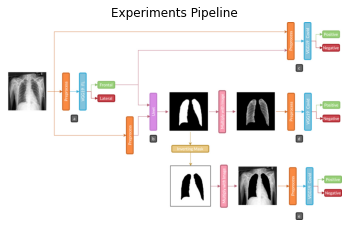
  
### Heatmaps
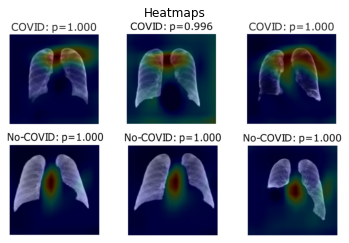


  
### ROC Curve
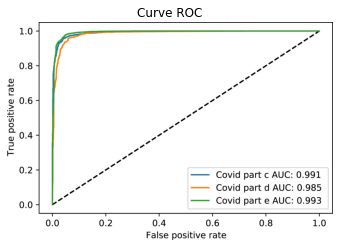

### False Positive Rate
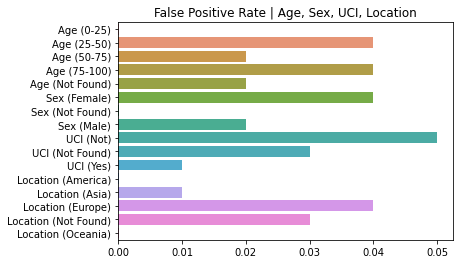

### False Negative Rate
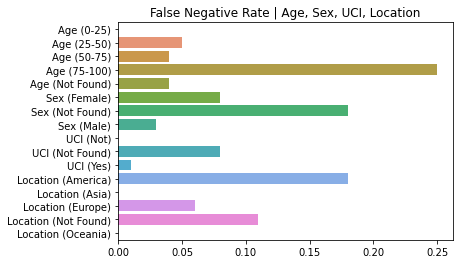

### False Discovery Rate
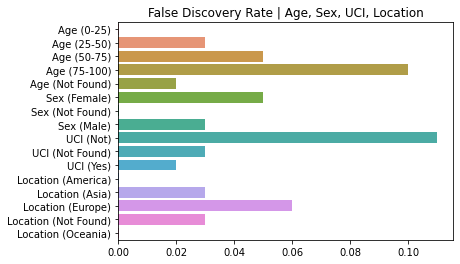

### False Omission Rate
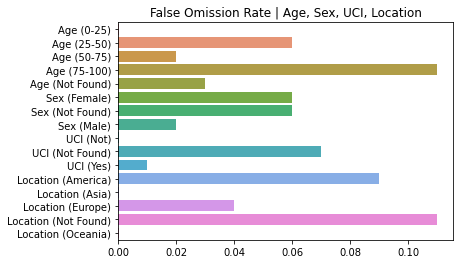


## Metrics

|Name|Value|
-----|------
|Accuracy, [c, d, e]|96.2 | 97.3 | 96.9 (None, None)|
|Sensitivity, [c, d, e]|97.3 | 92.8 | 98.1 (None, None)|
|Specificity, [c, d, e]|93.5 | 95.6 | 94.6 (None, None)|
|F1 Score, [c, d, e]|97.3 | 95.4 | 97.9 (None, None)|



In [ ]:
# Generate a model card document in Markdown
md_path = os.path.join(model_card_dir, 'template/md/default_template.md.jinja')
md_doc = mct.export_format(template_path=md_path, output_file='model_card.md')

# Display the model card document in Markdown
display.display(display.Markdown(md_doc))

Ubicación de las Model Cards (HTML y Markdown):

    /content/model_card_files/model_cards/